# Data Bootcamp Final Project - The Effect of Income and Population On Restuarant Sanitation

### Author : Mark Barash

### Email : * mb5422@nyu.edu *

The more affluent a neighborhood, the cleaner its streets, public facilities, and restuarants are, correct? Whenever I venture off into a not-so-safe neighborhood, I am rather unenthused to enter a restuarant and confidently say that I trust its sanitation compliance. This is where I got the idea to test income, and population (both by zipcode) against the number and types of restuarantviolations in those areas.

# How I went about getting this data:


##  Data Report

For my project, I gathered data from two different sources.

NYC Open Data, makes huge amounts of NYC agency gathered data available to the public for free. I decided to look at the NYC Restauarant Violations data set, which I will go into more detail about later on.You can check out the data set yourself here:
* NYC Open Data:  Restaurant Violations https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/xx67-kt59/data

Every year the United States collects data on population, income, and other various demographic characteristics. This huge set of data allow you to go broad and look at the country or states as a whole, or dive deeply into zip codes to gather information about specific communities. If you would like to learn more about the data and how the US gathers it, check out the link below:
* US Census Data : https://www.census.gov/data.html



## Restaurant Violations Data

The restaurant violations dataset was publicly available for download as a CSV file. This is simply a comma separated format for storing data, which is quite easy to manipulate using Python. This file has more that 320,000 records! Which is the largest dataset I've ever worked on.  To extract data from this file I used the pd.read_csv() method, which allows for me to easily convert a CSV file into a more so columns and rows based format, which is easier for the pandas library to work with. From there, I converted the CSV data into a DataFrame.

In order to pull, manipulate, analyze and graph data throughout this project, I used the following libraries:

* Pandas - for pulling, manipulating, and analyzing datasets
* Matplotlib - To plot my data in a visually appealing way
* Pyplot - a set of functions associated with matplotlib, which offers more advanced functionality

#### Importing the libraries:

In [317]:
import pandas as pd # given the alias pd 
import matplotlib.pyplot as plt # given the alias plt
%matplotlib inline 
#this allows for the graphs to be displayed within this notebook

#### Importing the restuarant violation data:

First, I saved the file as a variable called 'file'. When calling the pandas method read.csv(), you use the file variable as the parameter, allowing for the data to be stored into a new variable which I call 'dfalt'. Next, the data must be converted into a dataframe, which is a unique data type to the Pandas library. This lets us easily compare various data models, manipulate, and clean up the data.

In [318]:
#store the filename
file ='restaurants.csv'

#store the file data into a variable and read it using pd.read_csv()
dfalt = pd.read_csv(file)

#convert into a dataframe
dfalt = pd.DataFrame(dfalt)

# Rename the zipcode column to match the other dataset
dfalt = dfalt.rename(columns={'ZIPCODE':'zip'})
#rename the inspection date column into 'date'
dfalt = dfalt.rename(columns={'INSPECTION DATE':'date'})

#output the first five entries of the dataset
dfalt.head()



,CAMIS,DBA,BORO,BUILDING,STREET,zip,PHONE,CUISINE DESCRIPTION,date,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41540996,MEDI WINEBAR,MANHATTAN,811,9 AVENUE,10019.0,2125861201,Mediterranean,11/07/2013,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,13.0,A,11/07/2013,11/26/2017,Cycle Inspection / Re-inspection
1,41678767,BLUE COLLAR HAMBURGERS,BROOKLYN,160,HAVEMEYER STREET,11211.0,3477253837,American,11/10/2015,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,22.0,NaN,NaN,11/26/2017,Cycle Inspection / Initial Inspection
2,50005498,KENNEDY FRIED CHICKEN,BRONX,13,E MOUNT EDEN AVE,10452.0,3478499291,Chicken,01/12/2015,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,21.0,NaN,NaN,11/26/2017,Pre-permit (Operational) / Initial Inspection
3,41576495,EL POLLO INKA PERU,QUEENS,8912,NORTHERN BOULEVARD,11372.0,7185052822,Peruvian,02/04/2016,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,29.0,NaN,NaN,11/26/2017,Cycle Inspection / Initial Inspection
4,41464273,NO. 1 CHINA GARDEN KITCHEN,BRONX,1349,EDWARD L GRANT HIGHWAY,10452.0,7182935056,Chinese,10/21/2014,No violations were recorded at the time of thi...,20D,Choking first aid poster not posted. Alcohol...,Not Critical,NaN,NaN,NaN,11/26/2017,Administrative Miscellaneous / Initial Inspection


Above you can see a visual representaiton of the first five entries of the data set. There is a lot more than just the name of the restaurant and the type of violation. I can easily display the other columns by calling the .columns method onto the data frame, which I also convert to a list using the .tolist() method.

In [231]:
dfalt.columns.tolist()
#Here are all of the available columns

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'zip',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE']

#### Creating a Comparable Dataset

Now that I conveniently have my data stored as a dataframe, I want to filter certain things out, and aggregate the data that I really want to use. Thankfully panda offers a wide array of methods to apply to your data set such as :

* groupby() - which allows you to group by a certain column
* count() - which counts the occurence of a certain piece of data
* sort_values() - which lets you rank data based on ascending or descending values

I wanted to consolidate the amount of violations per zip code, but also see which boro the zip code belonged to. From the dfalt DataFrame I created above, I applied the groupby() and .count() methods to create a slice of that dataframe into a new one as such:

In [327]:
#create a new dataFrame consisting of zip, boro , and amount of violations for each, and call this column 'count'

g = dfalt.groupby(["zip",'BORO'])["VIOLATION CODE"].count().astype(float).reset_index(name="count")

#set the index of the dataFrame to 'zip'
g.set_index('zip')

#make sure the zip code is an integer, or else it could cause issues when merging with the other dataset
g['zip'] = g['zip'].astype(int)

#make sure the count of violations is an integer
g['count']=g['count'].astype(int)

g.head(5)



,zip,BORO,count
0,10001,MANHATTAN,7110
1,10002,MANHATTAN,7424
2,10003,MANHATTAN,10566
3,10004,MANHATTAN,1908
4,10005,MANHATTAN,878


Scarily enough, I can see my zipcode, '10003', which seems to have the most violations out of the first 10 zipcodes. That doesn't sit quite well.

This dataset offers a lot of valuable information. I have the capability to sort by violation, cuisine, and zipcode to then merge with zip code tabulation areas from the US Census API. Each zip code has various levels of demographic and socioeconomic differences, which can potentially identify unique trends coinciding with restaurant violations.

# Accessing Census Data

Within my data bootcamp course at NYU we went of the US census data, which is enormous in its size and scope. The data is easily accessible through an API (Application Program Interface). This API lets us pull the data directly from their databases, rather than us having to store it locally on our computer. First I needed to attain an API key, which gives me the permission to source their data, which I found through this link: https://api.census.gov/data/key_signup.html . I then created an object, which calls the Census API, further allowing me to run methods on it. When searching through census data, they offer a variety of codes, which are attributes or columns that give data on a specified location

I am using:

* B19013_001E : Income

* B01001_001E : Population

* Name : Name of the zip code tabulation

I am also using the acs5 Geographies, which is the most accurate dataset that US Census has to offer.

acs5 comes along with a get() method for which I must specify what geographic asset to pull. In my case I am looking for the zip code tabulation areas (zip codes), and using '*' as a value to retrieve all of the zip codes in the United States. With incomes and populations associated with zip codes - I can merge by zipcode to identify potential trends.


#### Importing the Census Data:

In order to work with the Census data I needed to download census, which is a library built to make working with the US Census data easier in Python

In [330]:
from census import Census 
from us import states

Now that I am able to access the data I need to use my API key to gain permission to request data from the source. Once that is granted I can now call methods onto this data set to pull the desired assets.

In [331]:
#storing my API key as a variable
my_api_key = '84c10978828b2a50b4bea223cca31706c739d983'

#Requesting the data from Census
c = Census(my_api_key)



#Get the name, income, and population
code = ("NAME","B19013_001E","B01001_001E")

NYC_zip_2015 = c.acs5.get(code,{'for': 'zip code tabulation area:*' }, year=2015)
NYC_zip_2015 = pd.DataFrame(NYC_zip_2015)
NYC_zip_2015.shape



#rename the zipcode column to match the other dataset
NYC_zip_2015=NYC_zip_2015.rename(columns={'zip code tabulation area': 'zip'})

#rename the column name to income
NYC_zip_2015=NYC_zip_2015.rename(columns={'B19013_001E': 'income'})

#rename the the column to population
NYC_zip_2015=NYC_zip_2015.rename(columns={'B01001_001E': 'population'})

NYC_zip_2015.set_index('zip')

#make sure the zipcodes are saved as ints, or else they wont be able to be merged
NYC_zip_2015['zip']=NYC_zip_2015['zip'].astype(int)


NYC_zip_2015.head()


,population,income,NAME,zip
0,17982.0,10816.0,ZCTA5 00601,601
1,40260.0,16079.0,ZCTA5 00602,602
2,52408.0,16804.0,ZCTA5 00603,603
3,6331.0,12512.0,ZCTA5 00606,606
4,28328.0,17475.0,ZCTA5 00610,610


Now that we have successfully pulled the US Census data and stored it as a DataFrame we can use it to work with the Restaurant Violations dataset. They both shared a zipcode column on which I am going to merge the two datasets

# Comparing Datasets

Pandas allows us to merge two datasets on a common field. In this case, both the Restaurants Violations data, and the US Census Data possess a zipcode. By merging the two on their zip code, I can now see the populations, income, boro, and count of violations per zip code.

I used the .merge() method in which I pass the 'g' dataframe, and the 'NYC_zip_2015' dataframe, which are merged
on the 'zip' column, using 'left' (or the restuarant dataset) as the set to add on to. Using left or right doesn't make a a difference in this cenario.

I create a new dataset called combo doing the following:

In [325]:
combo = pd.merge(g, NYC_zip_2015,# left df, right df
                 on='zip',       # link with cntry
                 how='left',        # add to left...does this matter here?
                 indicator=True)  # Tells us what happend

#display the first 5 entries of the merged data
combo.head(5)


,zip,BORO,count,population,income,NAME,_merge
0,10001,MANHATTAN,7110,23537.0,86801.0,ZCTA5 10001,both
1,10002,MANHATTAN,7424,80736.0,33726.0,ZCTA5 10002,both
2,10003,MANHATTAN,10566,57112.0,98151.0,ZCTA5 10003,both
3,10004,MANHATTAN,1908,3221.0,119691.0,ZCTA5 10004,both
4,10005,MANHATTAN,878,8131.0,124194.0,ZCTA5 10005,both


### Plotting Population & Income vs Restaurant Violations

To test my initial hypothesis about wealthier neighborhoods having cleaner eateries, I decided to plot a scatter plot of Income vs Violations. This could help me see the relationship between the two and gather insite on whether the two correlate.

With the matplotlib that I imported before I can use the .plot() method to create a graph for which I use the .scatter() method to decide which kind.

.scatter() takes the two fields of data you would like to compare:

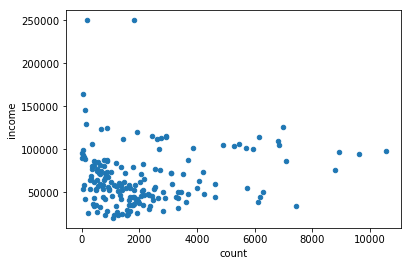

In [333]:
combo.plot.scatter('count','income')

#### Take-Aways

As you can see, there isn't quite a strong relationship between Income and the amount of restaurant violations within a given zip code. There is clearly a lot of differentiation within each zip code. Certain low-income areas may simply not have a lot of restaurants within them, naturally leading to a low amount of violations. The same can be said for wealthy neighborhoods. I also decided to take a look at whether or not population of each zip code played a role in the sanitation eateries.


I used the same method to plot, except this time, replacing income with population:



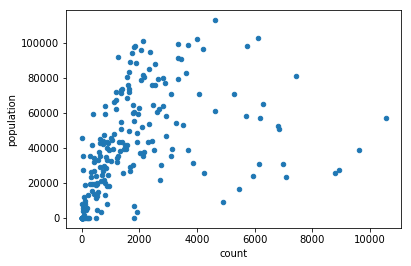

In [334]:
combo.plot.scatter('count','population')

You can see, with the exception of several outliers along the right side of the chart defy the correlation between the two. However, a vast majority of the data  which lies between the 0-2000 violation interval,seems to represent a fairly noticable correlation. Why does this make sense?

* The more people within a neighborhood means more foot traffic and more customers
* The more customers, the greater mess and likelihood for a restaurant to not keep clean
* The cleanliness of a restaurant is ultimately up to the owner and employees, however the more people within a given neighborhood makes it harder for restaurants to pay attention to every detail

### Having Fun With the Data

Another great asset of the Restaurant Violations data is the cuisine type. Potentially there is a type of cuisine which tends to violate more than others. To check this I created another dataframe called letsgo. Pulling from the dfalt dataframe I grouped by Cuisine Description, along with Boro, and added another column of the count of violations. I then ordered them by highest to lowest using the .sort_values() method with ascending = False.

In [360]:
letsgo = dfalt.groupby(['CUISINE DESCRIPTION',"BORO"])["VIOLATION CODE"].count().astype(float).reset_index(name="count")


letsgo['count'] = letsgo['count'].astype(int)
letsgo.sort_values('count', ascending = False)



,CUISINE DESCRIPTION,BORO,count
10,American,MANHATTAN,45580
9,American,BROOKLYN,19237
11,American,QUEENS,14526
77,Chinese,BROOKLYN,13010
79,Chinese,QUEENS,12449
78,Chinese,MANHATTAN,10762
188,Italian,MANHATTAN,10147
56,CafÃ©/Coffee/Tea,MANHATTAN,8273
193,Japanese,MANHATTAN,8261
213,"Latin (Cuban, Dominican, Puerto Rican, South &...",QUEENS,6834


Interestingly enough you can see that American food in Manhattan, Queens, and Brooklyn, ranks as the highest violating type of restaurant! That is slightly concerning, but makes sense due to the frequency of American food spots within New York City. We can also see that Chinese food ranks next worst in sanitation as the next highest violating cuisine in Manhattan, Queens, and Brooklyn! There is also quite a high frequency of Chinese restaurants around the city, which definitely accounts for such a high number, however provides some insight on the overall sanitation of dive chinese food in the city.